In [4]:
import numpy as np
from osgeo import gdal
import struct
from netCDF4 import Dataset
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

rootgrp = Dataset("E:\Documents\Datasets\Weather Data\Copernicus\Temp Max\\tasmaxAdjust_day_GFDL-ESM2G_SMHI-DBSrev930-GFD-1981-2010-postproc_rcp45_r1i1p1_20010101-20051231.nc")
lats = rootgrp.variables['lat'][:]
lons = rootgrp.variables['lon'][:]
t_max = rootgrp.variables['tasmaxAdjust'][:]
temp_units = rootgrp.variables['tasmaxAdjust'].units


In [5]:
print(t_max.max(), t_max.min())
print(np.shape(t_max))

372.50204 212.79927
(1826, 360, 720)


In [6]:
print(len(t_max), len(lats), len(lons))

1826 360 720


In [7]:
latv, lonv = np.meshgrid(lats, lons, indexing='ij')
print(np.shape(latv))
latv, lonv

(360, 720)


(masked_array(
   data=[[-89.75, -89.75, -89.75, ..., -89.75, -89.75, -89.75],
         [-89.25, -89.25, -89.25, ..., -89.25, -89.25, -89.25],
         [-88.75, -88.75, -88.75, ..., -88.75, -88.75, -88.75],
         ...,
         [ 88.75,  88.75,  88.75, ...,  88.75,  88.75,  88.75],
         [ 89.25,  89.25,  89.25, ...,  89.25,  89.25,  89.25],
         [ 89.75,  89.75,  89.75, ...,  89.75,  89.75,  89.75]],
   mask=False,
   fill_value=1e+20,
   dtype=float32),
 masked_array(
   data=[[-179.75, -179.25, -178.75, ...,  178.75,  179.25,  179.75],
         [-179.75, -179.25, -178.75, ...,  178.75,  179.25,  179.75],
         [-179.75, -179.25, -178.75, ...,  178.75,  179.25,  179.75],
         ...,
         [-179.75, -179.25, -178.75, ...,  178.75,  179.25,  179.75],
         [-179.75, -179.25, -178.75, ...,  178.75,  179.25,  179.75],
         [-179.75, -179.25, -178.75, ...,  178.75,  179.25,  179.75]],
   mask=False,
   fill_value=1e+20,
   dtype=float32))

<function matplotlib.pyplot.show(close=None, block=None)>

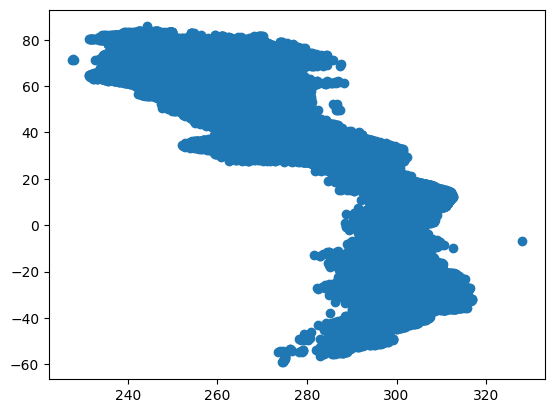

In [8]:
single_t = t_max[0, :, :].flatten()
lat_vector = latv.flatten()

plt.scatter(single_t, lat_vector)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

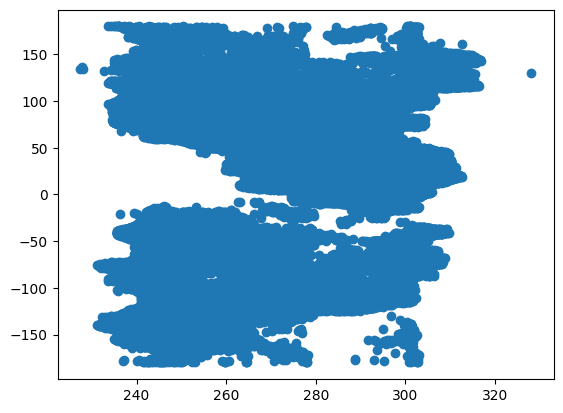

In [9]:
lon_vector = lonv.flatten()

plt.scatter(single_t, lon_vector)
plt.show


In [10]:
geo_max_max = np.max(t_max, axis=0)
geo_max_min = np.min(t_max, axis=0)
geo_max_std = np.std(t_max, axis=0)

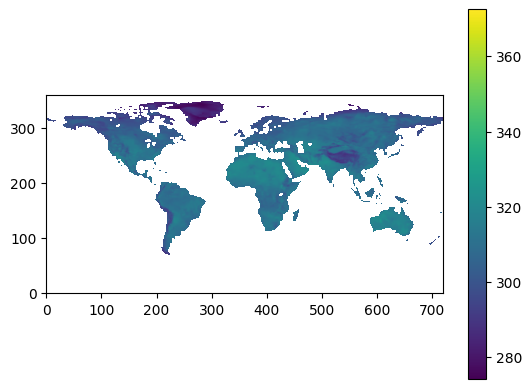

In [11]:
plt.imshow(geo_max_max)
plt.gca().invert_yaxis()
plt.colorbar()

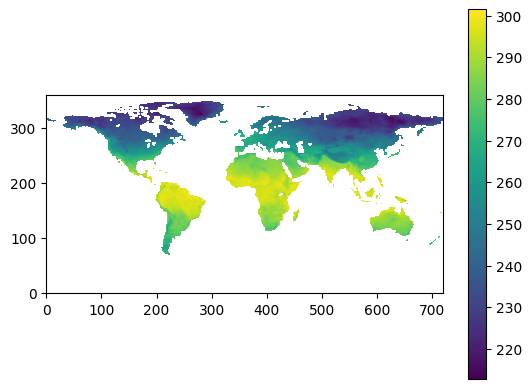

In [12]:
plt.imshow(geo_max_min)
plt.gca().invert_yaxis()
plt.colorbar()

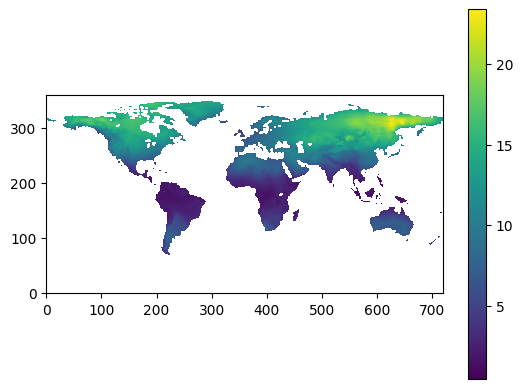

In [13]:
plt.imshow(geo_max_std)
plt.gca().invert_yaxis()
plt.colorbar()

In [14]:
gm_max_vector = geo_max_max.flatten()
gm_min_vector = geo_max_min.flatten()
gm_std_vector = geo_max_std.flatten()

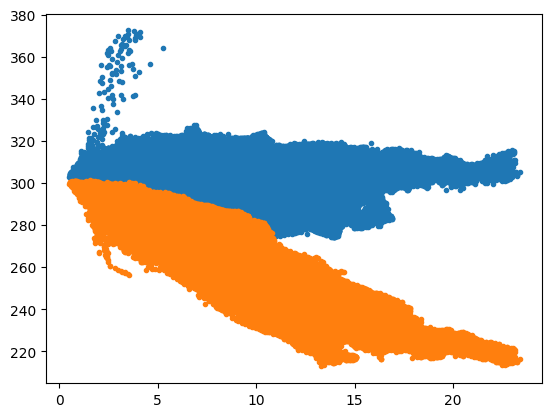

In [15]:
fig, ax = plt.subplots()

ax.scatter(gm_std_vector, gm_max_vector, marker='.')
ax.scatter(gm_std_vector, gm_min_vector, marker='.')

In [16]:
rootgrp2 = Dataset("E:\Documents\Datasets\Weather Data\Copernicus\Temp Max\\tasmaxAdjust_day_GFDL-ESM2G_SMHI-DBSrev930-GFD-1981-2010-postproc_rcp45_r1i1p1_20110101-20151231.nc")
t_max2 = rootgrp.variables['tasmaxAdjust'][:]

t_master = np.concatenate((t_max, t_max2))

print(np.shape(t_max), np.shape(t_max2), np.shape(t_master))

(1826, 360, 720) (1826, 360, 720) (3652, 360, 720)


In [18]:
np.savez_compressed('t_max', gmax=geo_max_max, gmin=geo_max_min, gstd=geo_max_std)
reload = np.load('t_max.npz')
print(dir(reload))

['__abstractmethods__', '__class__', '__class_getitem__', '__contains__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_files', 'allow_pickle', 'close', 'f', 'fid', 'files', 'get', 'items', 'iteritems', 'iterkeys', 'keys', 'pickle_kwargs', 'values', 'zip']
